# CSC3831 Coursework Part 1.2 - William Newbould

In [1]:
# Imports
# Install pandas 1.5.2 for better functionality from the .compare function
!pip install pandas==1.5.2

import random
import pandas as pd
pd.__version__
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**After running and installing the version of pandas you may need to 'restart' the runtime if the .compare function does not execute.**

In [2]:
# Load in the data with missing data along with the complete version
houses_complete = pd.read_csv('/content/houses2.txt', header=0)
houses_incomplete = pd.read_csv('/content/houses2_0.5_MAR.txt', header=0) 

Objectives regarding the data:


1. Gain an initial understanding of the data and the information it tells us.
  * take a glance at the dataset
  * look at the columns/features of the dataset
  
  Visualise the above by displaying the dataset and using the .columns function.

2. Check for missing data and isolate records containing missing data into a new dataframe.
  * use msno.matrix() to visualise the missingness
  * use isnull().sum() to find the number of missing values per feature


3. Impute the missing values using KNN imputation and MICE imputation and make a new dataframe for each set of data.
  * Compare each imputed value to the equivalent in the complete dataset.
  * Visually compare how the imputed data for each method compares the to data with missing values as well as the complete dataset. 


4. Train a regression model to predict the median house value of a region using the different imputed datasets and use appropriate metrics to compare.


5. Conclude which impuation method worked best.


In [3]:
c = houses_incomplete.columns
c

Index(['median_house_value', 'median_income', 'housing_median_age',
       'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude',
       'longitude'],
      dtype='object')

In [4]:
houses_complete

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
0,452600.0,8.3252,41.0,880.0,129.0,322.0,126.0,37.88,-122.23
1,358500.0,8.3014,21.0,7099.0,1106.0,2401.0,1138.0,37.86,-122.22
2,352100.0,7.2574,52.0,1467.0,190.0,496.0,177.0,37.85,-122.24
3,341300.0,5.6431,52.0,1274.0,235.0,558.0,219.0,37.85,-122.25
4,342200.0,3.8462,52.0,1627.0,280.0,565.0,259.0,37.85,-122.25
...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25.0,1665.0,374.0,845.0,330.0,39.48,-121.09
20636,77100.0,2.5568,18.0,697.0,150.0,356.0,114.0,39.49,-121.21
20637,92300.0,1.7000,17.0,2254.0,485.0,1007.0,433.0,39.43,-121.22
20638,84700.0,1.8672,18.0,1860.0,409.0,741.0,349.0,39.43,-121.32


In [5]:
houses_incomplete

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
0,452600.0,8.3252,41.0,880.0,129.0,NaN,126.0,37.88,-122.23
1,358500.0,8.3014,21.0,7099.0,1106.0,NaN,1138.0,37.86,-122.22
2,352100.0,7.2574,52.0,1467.0,190.0,NaN,177.0,37.85,-122.24
3,341300.0,5.6431,52.0,1274.0,235.0,NaN,219.0,37.85,-122.25
4,342200.0,3.8462,52.0,1627.0,280.0,565.0,259.0,37.85,-122.25
...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25.0,1665.0,374.0,845.0,330.0,39.48,-121.09
20636,77100.0,2.5568,18.0,697.0,150.0,356.0,114.0,39.49,-121.21
20637,92300.0,1.7000,17.0,2254.0,485.0,1007.0,433.0,39.43,-121.22
20638,84700.0,1.8672,18.0,1860.0,409.0,741.0,349.0,39.43,-121.32


From just looking at the first 5 records, it is clear that this dataset contains missing values. Let's have a closer look into the msisingness of the data.

## Understand the missingness of the data

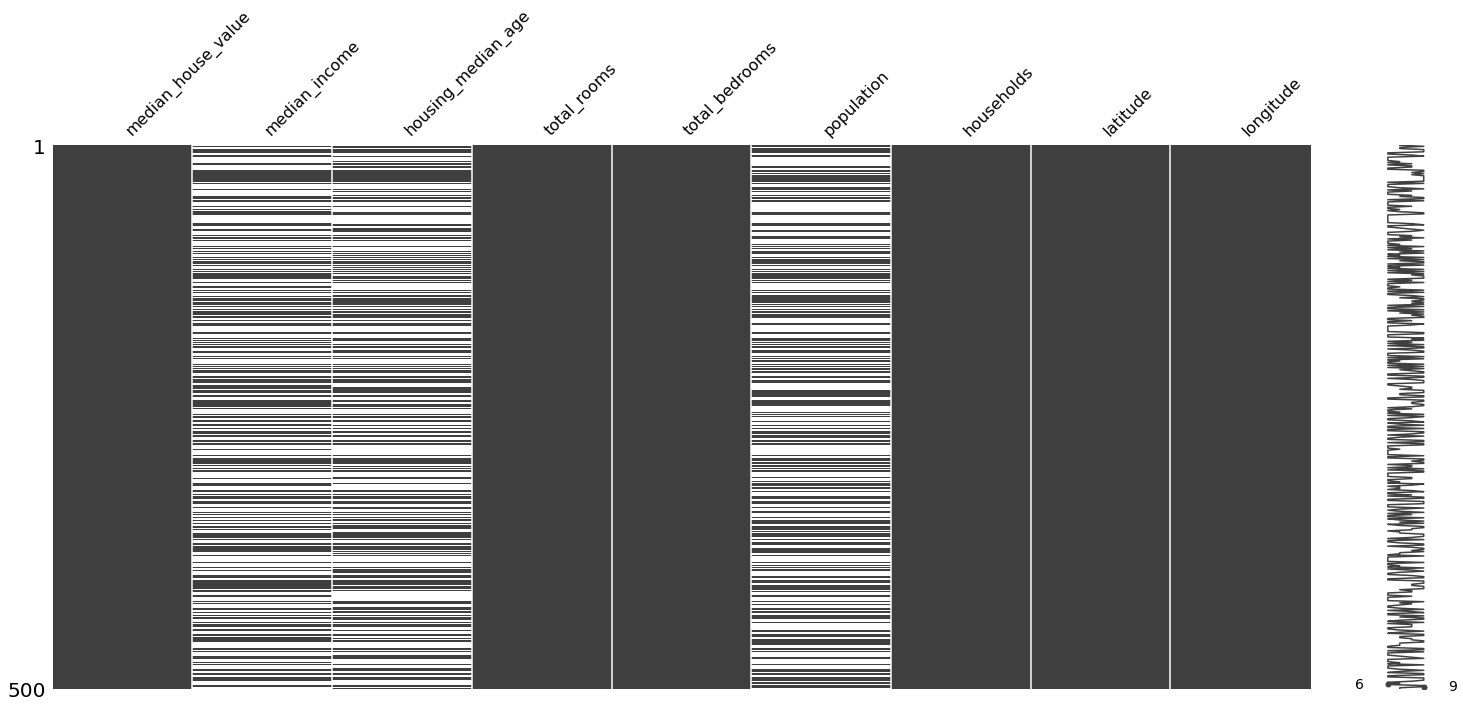

In [6]:
import missingno as msno

%matplotlib inline
msno.matrix(houses_incomplete.sample(500, random_state=32))

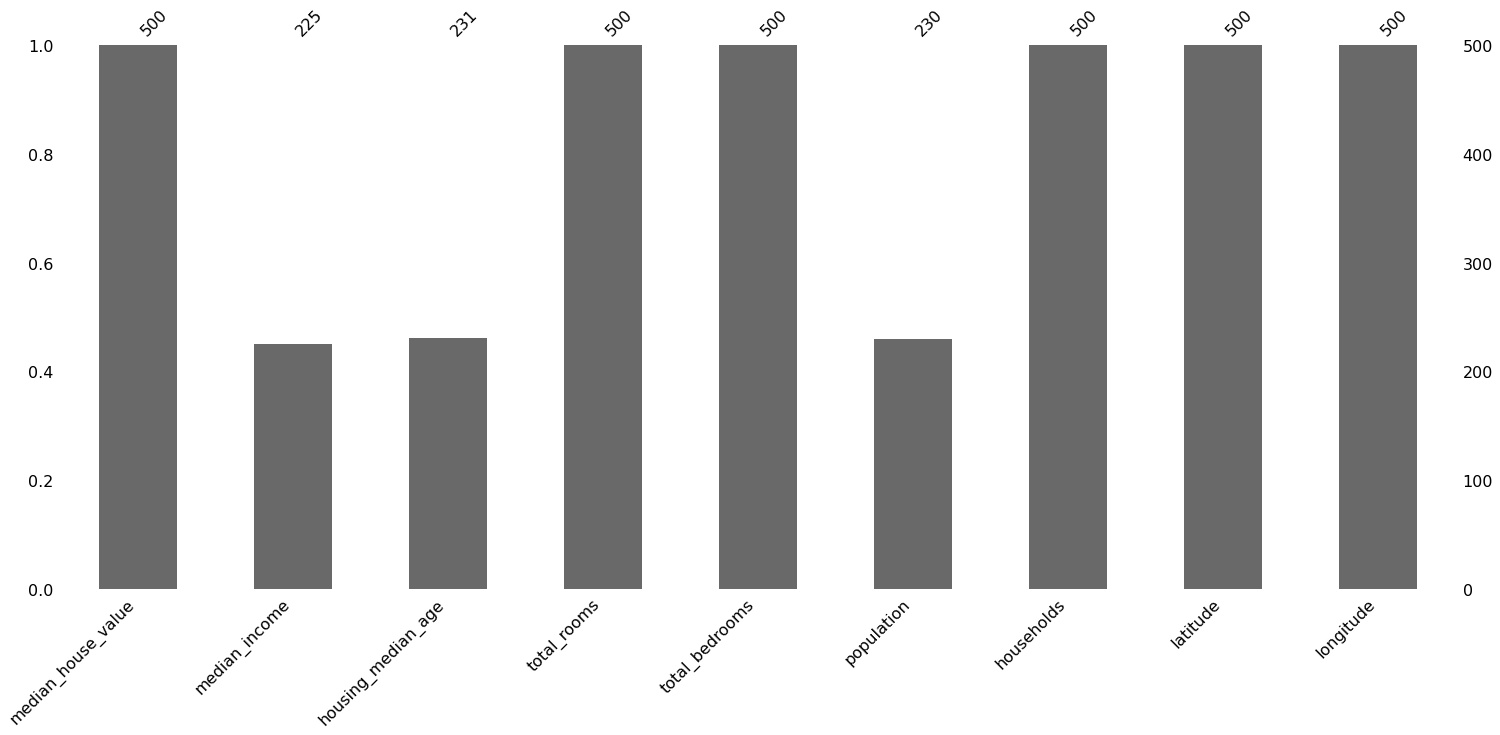

In [7]:
%matplotlib inline
msno.bar(houses_incomplete.sample(500, random_state=32))

In [8]:
# Find the number of missing values for each feature
houses_incomplete.isnull().sum()

median_house_value        0
median_income         10320
housing_median_age    10320
total_rooms               0
total_bedrooms            0
population            10320
households                0
latitude                  0
longitude                 0
dtype: int64

In [9]:
# Create dataframe containing missing values
houses_missing = houses_incomplete.copy()
houses_missing = houses_missing.loc[houses_missing['median_income'].isnull() | 
                                    houses_missing['housing_median_age'].isnull() |
                                    houses_missing['population'].isnull()]
houses_missing

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
0,452600.0,8.3252,41.0,880.0,129.0,NaN,126.0,37.88,-122.23
1,358500.0,8.3014,21.0,7099.0,1106.0,NaN,1138.0,37.86,-122.22
2,352100.0,7.2574,52.0,1467.0,190.0,NaN,177.0,37.85,-122.24
3,341300.0,5.6431,52.0,1274.0,235.0,NaN,219.0,37.85,-122.25
61,75000.0,6.1183,49.0,135.0,29.0,NaN,23.0,37.82,-122.29
...,...,...,...,...,...,...,...,...,...
20504,343900.0,NaN,NaN,5451.0,736.0,2526.0,752.0,34.29,-118.73
20505,248000.0,NaN,NaN,3266.0,529.0,1595.0,494.0,34.29,-118.72
20506,276500.0,NaN,NaN,4983.0,754.0,2510.0,725.0,34.29,-118.73
20531,286000.0,5.9629,17.0,1964.0,314.0,NaN,286.0,38.58,-121.81


From the information revealed above, there are 3 features that contain missing values. All 3 features have 13,185 missing values which is over half the size of the datatset! That is a lot of missing data.

I will know look into how I can impute the missing data. I will use two different methods of imputation:
* KNN imoputation
* MICE imputation

## KNN Imputation

In [10]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights="uniform")
imputer.fit_transform(houses_incomplete)

array([[ 4.5260e+05,  8.3252e+00,  4.1000e+01, ...,  1.2600e+02,
         3.7880e+01, -1.2223e+02],
       [ 3.5850e+05,  8.3014e+00,  2.1000e+01, ...,  1.1380e+03,
         3.7860e+01, -1.2222e+02],
       [ 3.5210e+05,  7.2574e+00,  5.2000e+01, ...,  1.7700e+02,
         3.7850e+01, -1.2224e+02],
       ...,
       [ 9.2300e+04,  1.7000e+00,  1.7000e+01, ...,  4.3300e+02,
         3.9430e+01, -1.2122e+02],
       [ 8.4700e+04,  1.8672e+00,  1.8000e+01, ...,  3.4900e+02,
         3.9430e+01, -1.2132e+02],
       [ 8.9400e+04,  2.3886e+00,  1.6000e+01, ...,  5.3000e+02,
         3.9370e+01, -1.2124e+02]])

In [11]:
KNNimputed_array = imputer.transform(houses_incomplete)
KNNimputed_array

array([[ 4.5260e+05,  8.3252e+00,  4.1000e+01, ...,  1.2600e+02,
         3.7880e+01, -1.2223e+02],
       [ 3.5850e+05,  8.3014e+00,  2.1000e+01, ...,  1.1380e+03,
         3.7860e+01, -1.2222e+02],
       [ 3.5210e+05,  7.2574e+00,  5.2000e+01, ...,  1.7700e+02,
         3.7850e+01, -1.2224e+02],
       ...,
       [ 9.2300e+04,  1.7000e+00,  1.7000e+01, ...,  4.3300e+02,
         3.9430e+01, -1.2122e+02],
       [ 8.4700e+04,  1.8672e+00,  1.8000e+01, ...,  3.4900e+02,
         3.9430e+01, -1.2132e+02],
       [ 8.9400e+04,  2.3886e+00,  1.6000e+01, ...,  5.3000e+02,
         3.9370e+01, -1.2124e+02]])

In [12]:
houses_KNNimputed = pd.DataFrame(data=KNNimputed_array, columns=c)
houses_KNNimputed

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
0,452600.0,8.3252,41.0,880.0,129.0,697.8,126.0,37.88,-122.23
1,358500.0,8.3014,21.0,7099.0,1106.0,2508.6,1138.0,37.86,-122.22
2,352100.0,7.2574,52.0,1467.0,190.0,656.2,177.0,37.85,-122.24
3,341300.0,5.6431,52.0,1274.0,235.0,539.0,219.0,37.85,-122.25
4,342200.0,3.8462,52.0,1627.0,280.0,565.0,259.0,37.85,-122.25
...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25.0,1665.0,374.0,845.0,330.0,39.48,-121.09
20636,77100.0,2.5568,18.0,697.0,150.0,356.0,114.0,39.49,-121.21
20637,92300.0,1.7000,17.0,2254.0,485.0,1007.0,433.0,39.43,-121.22
20638,84700.0,1.8672,18.0,1860.0,409.0,741.0,349.0,39.43,-121.32


### Compare KNN imputed data to the actual values in the complete dataset

I will now directly compare how the KNN imputed data compares to the complete version of the dataset

In [13]:
# make copies of the comple and imputed datasets
complete = houses_complete.copy()
KNNimputed = houses_KNNimputed.copy()

# reduce the datasets to the columns that had missing data
complete = complete[['median_income', 'housing_median_age', 'population']]
KNNimputed = KNNimputed[['median_income', 'housing_median_age', 'population']]

# locate the records in both datasets that had missing values
complete = complete[complete.index.isin(houses_missing.index)]
KNNimputed = KNNimputed[KNNimputed.index.isin(houses_missing.index)]

# compare knn_imputed values to the actual value in the complete dataset for 
# every record that had missing values
# The use of 'result_names' below requires a version pandas 1.5.0 or later
check = complete.compare(KNNimputed, keep_equal=True, keep_shape=True,result_names=("actual", "KNN"))
check

median_income          housing_median_age       population        
             actual      KNN             actual   KNN     actual     KNN
0            8.3252  8.32520               41.0  41.0      322.0   697.8
1            8.3014  8.30140               21.0  21.0     2401.0  2508.6
2            7.2574  7.25740               52.0  52.0      496.0   656.2
3            5.6431  5.64310               52.0  52.0      558.0   539.0
61           6.1183  6.11830               49.0  49.0       86.0   107.4
...             ...      ...                ...   ...        ...     ...
20504        7.3550  6.31198               11.0  21.6     2526.0  2526.0
20505        6.0368  5.35068               22.0  22.8     1595.0  1595.0
20506        6.9454  4.58386                8.0  28.0     2510.0  2510.0
20531        5.9629  5.96290               17.0  17.0      808.0   968.6
20573        5.6790  5.67900               20.0  20.0      457.0   388.8

[13185 rows x 6 columns]

The KNN imputed values are reasonably close to the actual values for the records that are visible in the table above.

### Effect of KNN impuatation on the missing portion of the dataset

I will now visually illustrate the difference between the complete dataset, the dataset with missing values and the dataset with KNN imputed values by displaying violinplots and kdeplots for each of the three features that have missing values.

In [14]:
# Create a dataframe which merges the original dirty data with the cleaned data
# Add a column called 'State of data' and label the dirty data as 'dirty' and the 
# clean data as 'clean'. By doing this, I can illustrate the histograms and 
# violinplots below.

# Create new DataFrame
df_complete =  complete.copy()
# Adding a new column with same values
complete_value = 'Complete Data'
df_complete.insert(len(df_complete.columns),'State of data',complete_value)

# Create new DataFrame
df_KNNimputed =  KNNimputed.copy()
# Adding a new column with same values
imputed_value = 'KNN Imputed Data'
df_KNNimputed.insert(len(df_KNNimputed.columns),'State of data',imputed_value)

# merge the complete and imputed datasets together
compare_ci = pd.merge(df_complete, df_KNNimputed, how="outer", indicator=False)

# Create new DataFrame
df_missing =  houses_missing.copy()
# Adding a new column with same values
df_missing = df_missing[['median_income', 'housing_median_age', 'population']]
missing_value = 'Missing Data'
df_missing.insert(len(df_missing.columns),'State of data',missing_value)

# merge the complete, missing and imputed datasets together
compare_cmi = pd.merge(compare_ci, df_missing, how="outer", indicator=False)
compare_cmi

,median_income,housing_median_age,population,State of data
0,8.3252,41.0,322.0,Complete Data
1,8.3014,21.0,2401.0,Complete Data
2,7.2574,52.0,496.0,Complete Data
3,5.6431,52.0,558.0,Complete Data
4,6.1183,49.0,86.0,Complete Data
...,...,...,...,...
39550,NaN,NaN,2526.0,Missing Data
39551,NaN,NaN,1595.0,Missing Data
39552,NaN,NaN,2510.0,Missing Data
39553,5.9629,17.0,NaN,Missing Data


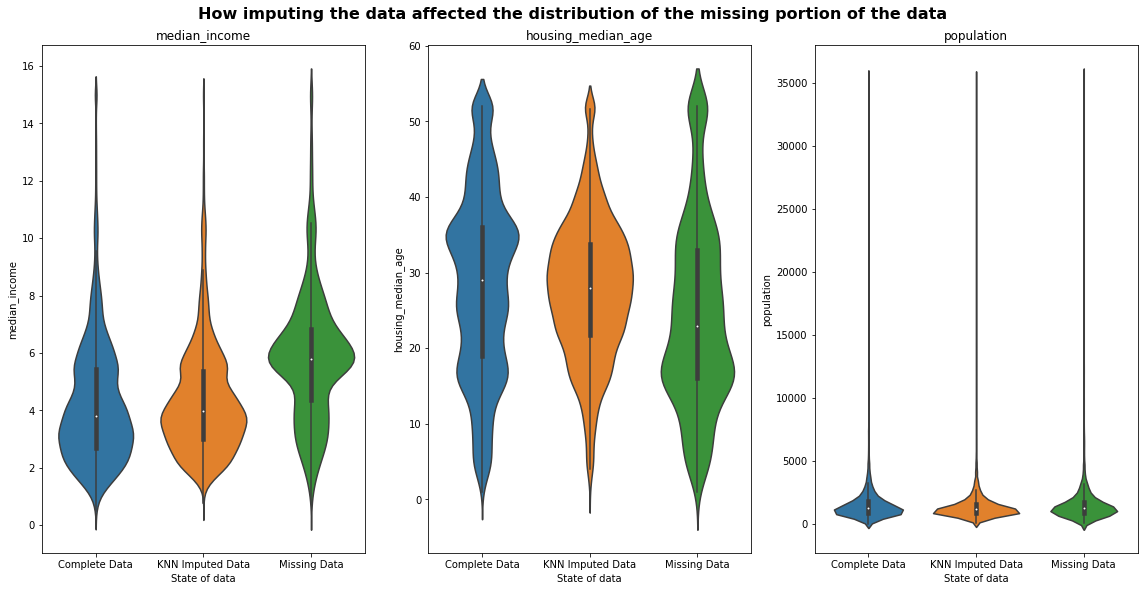

In [15]:
# violinplot for each feature
index = 1
fig = plt.figure(figsize = (16,8))
fig.suptitle('How imputing the data affected the distribution of the missing portion of the data', fontsize=16, fontweight='bold', y=1.02)

for i in compare_cmi.columns[:len(compare_cmi.columns)-1]:
  plt.subplot(1,3, index)
  sns.violinplot(data=compare_cmi, x='State of data', y=compare_cmi[i])
  plt.title(i)
  index = index + 1
plt.tight_layout()
plt.show()

From the above violinplot it appears that KNN imputation has made the distribution of the data fit closer to the complete dataset, this therefore is proof of the relative sucess of the KNN imputation.

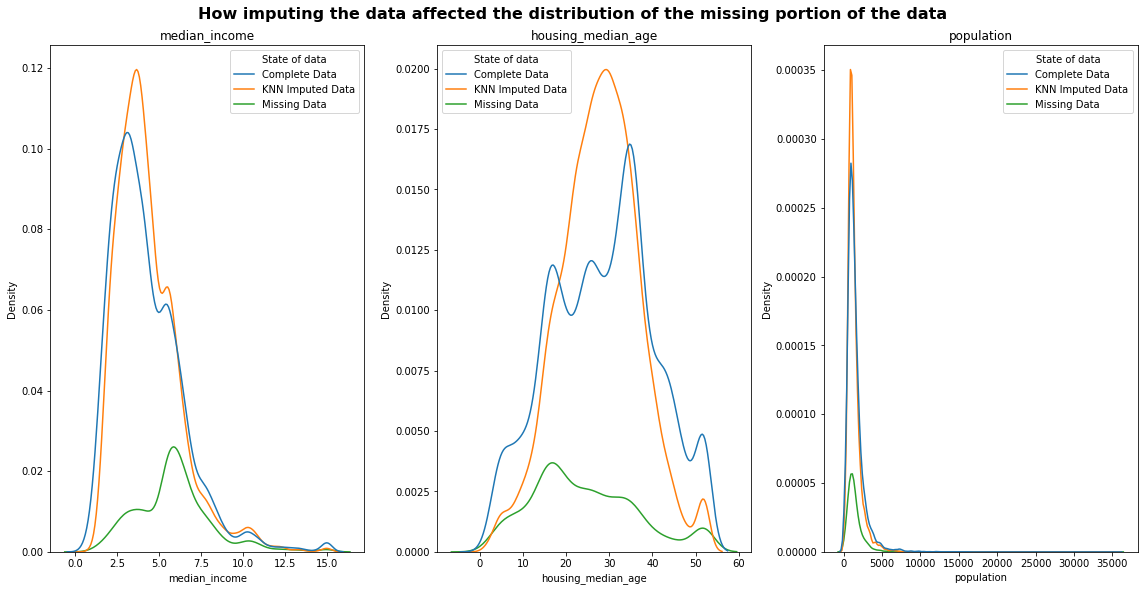

In [16]:
# kdeplot for each feature
index = 1
fig = plt.figure(figsize = (16,8))
fig.suptitle('How imputing the data affected the distribution of the missing portion of the data', fontsize=16, fontweight='bold', y=1.02)

for i in compare_cmi.columns[:len(compare_cmi.columns)-1]:
  plt.subplot(1,3, index)
  sns.kdeplot(data=compare_cmi, x=compare_cmi[i], hue='State of data')
  plt.title(i)
  index = index + 1
plt.tight_layout()
plt.show()

From the above kdeplots it is clear that for median income and population the KNN imputation has performed very well as the KNN curves are of a similar shape and density as the complete data. while the KNN curve for housing median age shares a similar density to the complete curve, the shape isnt quite right.

Generally though, it appears as if KNN imputation has performed well, as it has achieved a closer similarity to the complete data than the data with missing values.

### Effect of KNN imputation on the entire datatset

In [17]:
# Create a dataframe which merges the original dirty data with the cleaned data
# Add a column called 'State of data' and label the dirty data as 'dirty' and the 
# clean data as 'clean'. By doing this, I can illustrate the histograms and 
# violinplots below.

# Create new DataFrame
df_complete =  houses_complete.copy()
df_complete = df_complete[['median_income', 'housing_median_age', 'population']]
# Adding a new column with same values
complete_value = 'Complete Data'
df_complete.insert(len(df_complete.columns),'State of data',complete_value)

# Create new DataFrame
df_KNNimputed =  houses_KNNimputed.copy()
df_KNNimputed = df_KNNimputed[['median_income', 'housing_median_age', 'population']]
# Adding a new column with same values
imputed_value = 'KNN Imputed Data'
df_KNNimputed.insert(len(df_KNNimputed.columns),'State of data',imputed_value)

# merge the complete and imputed datasets together
compare_ci = pd.merge(df_complete, df_KNNimputed, how="outer", indicator=False)

# Create new DataFrame
df_missing =  houses_incomplete.copy()
df_missing = df_missing[['median_income', 'housing_median_age', 'population']]
# Adding a new column with same values
missing_value = 'Missing Data'
df_missing.insert(len(df_missing.columns),'State of data',missing_value)

# merge the complete, missing and imputed datasets together
compare_cmi = pd.merge(compare_ci, df_missing, how="outer", indicator=False)
compare_cmi

,median_income,housing_median_age,population,State of data
0,8.3252,41.0,322.0,Complete Data
1,8.3014,21.0,2401.0,Complete Data
2,7.2574,52.0,496.0,Complete Data
3,5.6431,52.0,558.0,Complete Data
4,3.8462,52.0,565.0,Complete Data
...,...,...,...,...
61915,1.5603,25.0,845.0,Missing Data
61916,2.5568,18.0,356.0,Missing Data
61917,1.7000,17.0,1007.0,Missing Data
61918,1.8672,18.0,741.0,Missing Data


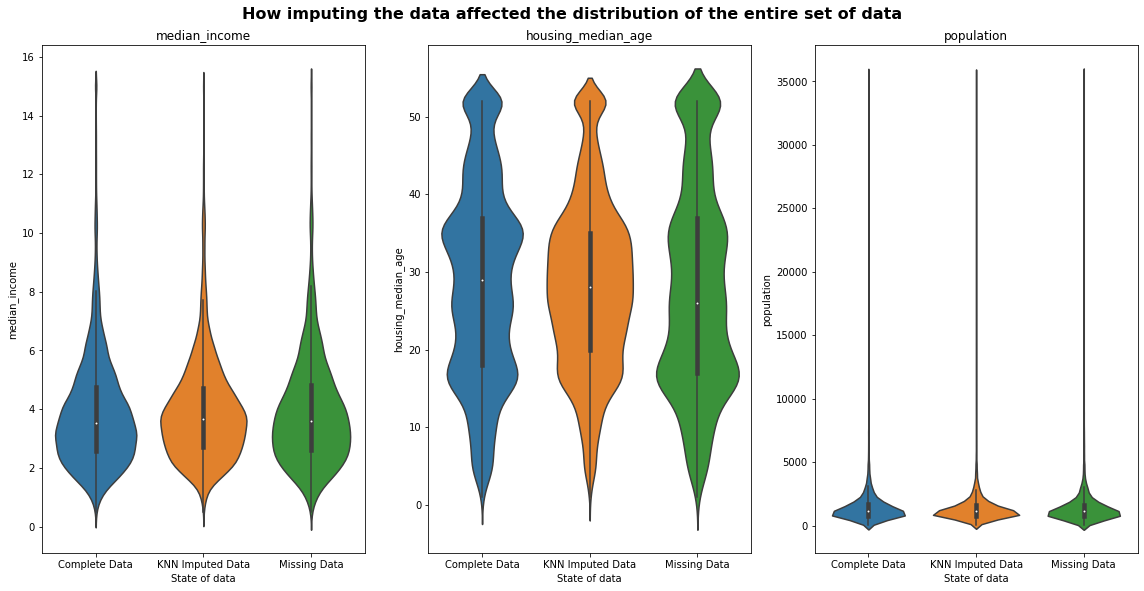

In [18]:
index = 1
fig = plt.figure(figsize = (16,8))
fig.suptitle('How imputing the data affected the distribution of the entire set of data', fontsize=16, fontweight='bold', y=1.02)

for i in compare_cmi.columns[:len(compare_cmi.columns)-1]:
  plt.subplot(1,3, index)
  sns.violinplot(data=compare_cmi, x='State of data', y=compare_cmi[i])
  plt.title(i)
  index = index + 1
plt.tight_layout()
plt.show()

From the above violinplot it appears that over the entire dataset, KNN imputation marginally alters the distribution of the data hence the slight difference of shape in the different violinplots. 

In some cases, the KNN imputed data looks to share more simialrity to the complete dataset than the missing dataset, however the reverse can also be said to be true in other areas. This, therefore, is proof of the relative sucess of the KNN imputation.

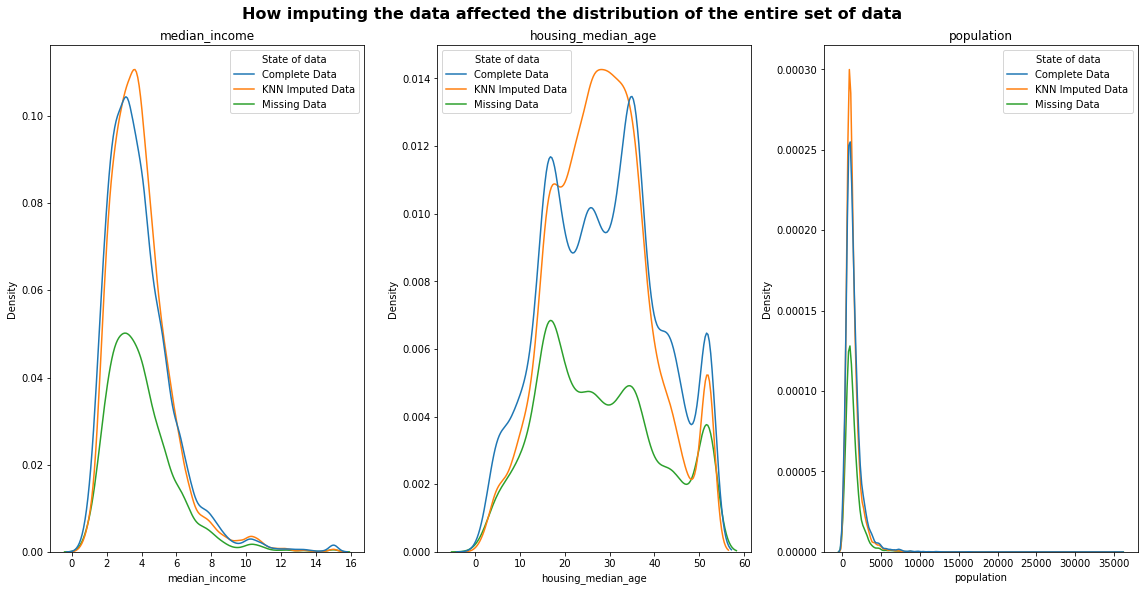

In [19]:
index = 1
fig = plt.figure(figsize = (16,8))
fig.suptitle('How imputing the data affected the distribution of the entire set of data', fontsize=16, fontweight='bold', y=1.02)

for i in compare_cmi.columns[:len(compare_cmi.columns)-1]:
  plt.subplot(1,3, index)
  sns.kdeplot(data=compare_cmi, x=compare_cmi[i], hue='State of data')
  plt.title(i)
  index = index + 1
plt.tight_layout()
plt.show()

From the above kdeplots it is clear that for median income and population the KNN imputation has performed very well as the KNN curves are of a similar shape and density as the complete data. while the KNN curve for housing median age shares a similar density to the complete curve, the shape isnt quite right.

Generally though, it appears as if KNN imputation has performed well, as it has achieved a closer similarity to the complete data than the data with missing values.

Having imputed the data I will now train a model using the imputed data and see how well it performs.

### Standardise the data

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_houses_KNNimputed = scaler.fit_transform(houses_KNNimputed)
scaled_houses_KNNimputed = pd.DataFrame(scaled_houses_KNNimputed, columns=c)
scaled_houses_KNNimputed.head()

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
0,2.129631,2.506269,1.171539,-0.804819,-0.970706,-0.653613,-0.977033,1.052548,-1.327835
1,1.314156,2.492684,-0.661358,2.045890,1.348649,1.239953,1.669961,1.043185,-1.322844
2,1.258693,1.896807,2.179631,-0.535746,-0.825895,-0.697114,-0.843637,1.038503,-1.332827
3,1.165100,0.975422,2.179631,-0.624215,-0.719067,-0.819671,-0.733781,1.038503,-1.337818
4,1.172900,-0.050184,2.179631,-0.462404,-0.612239,-0.792483,-0.629157,1.038503,-1.337818


### Train Regression Model 1

In [21]:
X_Features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']
X = scaled_houses_KNNimputed[X_Features]
Y = scaled_houses_KNNimputed['median_house_value']

In [22]:
print(X.shape)
print(Y.shape)

(20640, 8)
(20640,)


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(16512, 8) (16512,)
(4128, 8) (4128,)


In [24]:
from sklearn.linear_model import LinearRegression

m1 = LinearRegression() # instance of linear regression

m1.fit(x_train, y_train) # train the model using our training data

LinearRegression()

### Regression Model 1 Results 

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = m1.predict(x_test)
print("Root Mean Squared Error: ", mean_squared_error(y_test, y_pred, squared = False))
print("R2 Score: ", r2_score(y_test, y_pred))

Root Mean Squared Error:  0.5340393563318201
R2 Score:  0.7053482921021403


* Low RMSE, high R² (the best case)
* Low RMSE, low R²
* High RMSE, high R²
* High RMSE, low R² (the worst case)

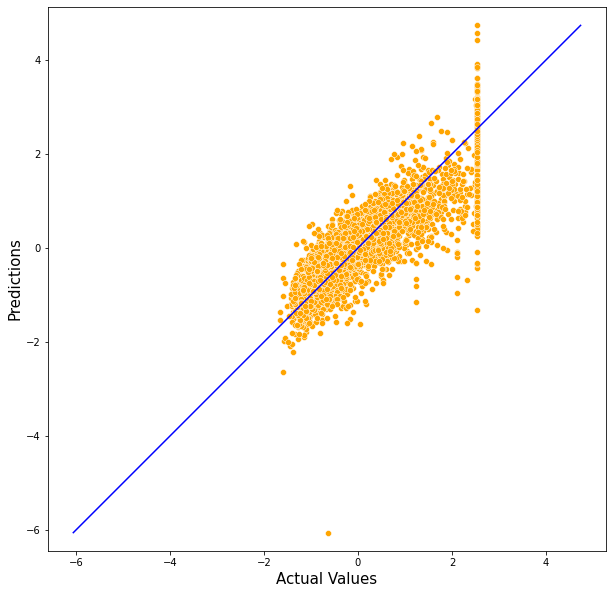

In [26]:
# Predicted values vs Actual values
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test, y=y_pred, color='orange')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')

plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

The closer to the data points are to the blue line, the more accurate the model preedicted that value.

## MICE Imputation

In [27]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(missing_values=np.nan, add_indicator=False,
                               random_state=0, n_nearest_features=5)
imputer.fit(houses_incomplete)

IterativeImputer(n_nearest_features=5, random_state=0)

In [28]:
MICEimputed_array = imputer.transform(houses_incomplete)
MICEimputed_array

array([[ 4.5260e+05,  8.3252e+00,  4.1000e+01, ...,  1.2600e+02,
         3.7880e+01, -1.2223e+02],
       [ 3.5850e+05,  8.3014e+00,  2.1000e+01, ...,  1.1380e+03,
         3.7860e+01, -1.2222e+02],
       [ 3.5210e+05,  7.2574e+00,  5.2000e+01, ...,  1.7700e+02,
         3.7850e+01, -1.2224e+02],
       ...,
       [ 9.2300e+04,  1.7000e+00,  1.7000e+01, ...,  4.3300e+02,
         3.9430e+01, -1.2122e+02],
       [ 8.4700e+04,  1.8672e+00,  1.8000e+01, ...,  3.4900e+02,
         3.9430e+01, -1.2132e+02],
       [ 8.9400e+04,  2.3886e+00,  1.6000e+01, ...,  5.3000e+02,
         3.9370e+01, -1.2124e+02]])

In [29]:
houses_MICEimputed = pd.DataFrame(data=MICEimputed_array, columns=c)
houses_MICEimputed

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
0,452600.0,8.3252,41.0,880.0,129.0,379.759648,126.0,37.88,-122.23
1,358500.0,8.3014,21.0,7099.0,1106.0,3439.387425,1138.0,37.86,-122.22
2,352100.0,7.2574,52.0,1467.0,190.0,522.857164,177.0,37.85,-122.24
3,341300.0,5.6431,52.0,1274.0,235.0,552.663421,219.0,37.85,-122.25
4,342200.0,3.8462,52.0,1627.0,280.0,565.000000,259.0,37.85,-122.25
...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25.0,1665.0,374.0,845.000000,330.0,39.48,-121.09
20636,77100.0,2.5568,18.0,697.0,150.0,356.000000,114.0,39.49,-121.21
20637,92300.0,1.7000,17.0,2254.0,485.0,1007.000000,433.0,39.43,-121.22
20638,84700.0,1.8672,18.0,1860.0,409.0,741.000000,349.0,39.43,-121.32


### The issue with MICE imputation

In [30]:
# Illustrate issue with MICE
NegMICE = houses_MICEimputed.loc[(houses_MICEimputed['population'] < 0) |
                                 (houses_MICEimputed['housing_median_age'] < 0) | 
                                 (houses_MICEimputed['median_income'] < 0)]
NegMICE.head(10)

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
2311,143700.0,4.291400,-0.779361,13802.0,2244.0,5835.986527,1972.0,36.87,-119.75
3086,90000.0,2.579889,26.599070,1491.0,408.0,-43.015944,48.0,35.72,-118.59
3364,67500.0,5.517900,36.000000,36.0,8.0,-6.627772,7.0,40.41,-120.51
5921,349100.0,7.184652,-9.229501,17715.0,2370.0,7555.673194,2312.0,34.15,-117.71
5924,358700.0,7.195664,-6.515435,16759.0,2274.0,7009.497780,2156.0,34.13,-117.76
5964,348900.0,7.251263,-11.147542,18448.0,2474.0,7824.753247,2397.0,34.08,-117.81
6055,310700.0,6.586135,-5.952807,17820.0,2812.0,8044.272307,2666.0,33.99,-117.86
6057,253900.0,7.117721,-37.554610,32054.0,5290.0,14858.930912,5050.0,34.03,-117.78
6061,315600.0,6.747540,-8.484899,18690.0,2862.0,8497.662873,2777.0,34.02,-117.79
6063,267000.0,6.054901,-6.141049,17527.0,2751.0,8105.189841,2676.0,33.99,-117.83


In [31]:
print("Number of records with negative predicted values: " + str(len(NegMICE)))

Number of records with negative predicted values: 54


Notice the negative values for population, median income and housing median age. This is one of the downsides of MICE as it can produce negative values. In this case in particular a negative population house age makes no sense in the real-world.

### Compare MICE imputed data to the actual values in the complete dataset

I will now directly compare how the MICE imputed data compares to the complete version of the dataset

In [32]:
# make copies of the comple and imputed datasets
complete = houses_complete.copy()
MICEimputed = houses_MICEimputed.copy()

# reduce the datasets to the columns that had missing data
complete = complete[['median_income', 'housing_median_age', 'population']]
MICEimputed = MICEimputed[['median_income', 'housing_median_age', 'population']]

# locate the records in both datasets that had missing values
complete = complete[complete.index.isin(houses_missing.index)]
MICEimputed = MICEimputed[MICEimputed.index.isin(houses_missing.index)]

# compare MICE_imputed values to the actual value in the complete dataset for 
# every record that had missing values
# The use of 'result_names' below requires a version pandas 1.5.0 or later
check = complete.compare(MICEimputed, keep_equal=True, keep_shape=True,result_names=("actual", "MICE"))
check

median_income           housing_median_age            population  \
             actual      MICE             actual       MICE     actual   
0            8.3252  8.325200               41.0  41.000000      322.0   
1            8.3014  8.301400               21.0  21.000000     2401.0   
2            7.2574  7.257400               52.0  52.000000      496.0   
3            5.6431  5.643100               52.0  52.000000      558.0   
61           6.1183  6.118300               49.0  49.000000       86.0   
...             ...       ...                ...        ...        ...   
20504        7.3550  5.872815               11.0  22.430105     2526.0   
20505        6.0368  4.533600               22.0  26.304067     1595.0   
20506        6.9454  5.029440                8.0  22.280420     2510.0   
20531        5.9629  5.962900               17.0  17.000000      808.0   
20573        5.6790  5.679000               20.0  20.000000      457.0   

                    
              MICE  
0       379.759648  
1      3439.387425  
2       522.857164  
3       552.663421  
61       24.548690  
...            ...  
20504  2526.000000  
20505  1595.000000  
20506  2510.000000  
20531   911.637999  
20573   518.161385  

[13185 rows x 6 columns]

The  imputed values are reasonably close to the actual values for the records that are visible in the table above.

### Effect of MICE impuatation on the missing portion of the dataset

I will now visually illustrate the difference between the complete dataset, the dataset with missing values and the dataset with MICE imputed values by displaying violinplots and kdeplots for each of the three features that have missing values.

In [33]:
# Create a dataframe which merges the original dirty data with the cleaned data
# Add a column called 'State of data' and label the dirty data as 'dirty' and the 
# clean data as 'clean'. By doing this, I can illustrate the histograms and 
# violinplots below.

# Create new DataFrame
df_complete =  complete.copy()
# Adding a new column with same values
complete_value = 'Complete Data'
df_complete.insert(len(df_complete.columns),'State of data',complete_value)

# Create new DataFrame
df_MICEimputed =  MICEimputed.copy()
# Adding a new column with same values
imputed_value = 'MICE Imputed Data'
df_MICEimputed.insert(len(df_MICEimputed.columns),'State of data',imputed_value)

# merge the complete and imputed datasets together
compare_ci = pd.merge(df_complete, df_MICEimputed, how="outer", indicator=False)

# Create new DataFrame
df_missing =  houses_missing.copy()
# Adding a new column with same values
df_missing = df_missing[['median_income', 'housing_median_age', 'population']]
missing_value = 'Missing Data'
df_missing.insert(len(df_missing.columns),'State of data',missing_value)

# merge the complete, missing and imputed datasets together
compare_cmi = pd.merge(compare_ci, df_missing, how="outer", indicator=False)
compare_cmi

,median_income,housing_median_age,population,State of data
0,8.3252,41.0,322.0,Complete Data
1,8.3014,21.0,2401.0,Complete Data
2,7.2574,52.0,496.0,Complete Data
3,5.6431,52.0,558.0,Complete Data
4,6.1183,49.0,86.0,Complete Data
...,...,...,...,...
39550,NaN,NaN,2526.0,Missing Data
39551,NaN,NaN,1595.0,Missing Data
39552,NaN,NaN,2510.0,Missing Data
39553,5.9629,17.0,NaN,Missing Data


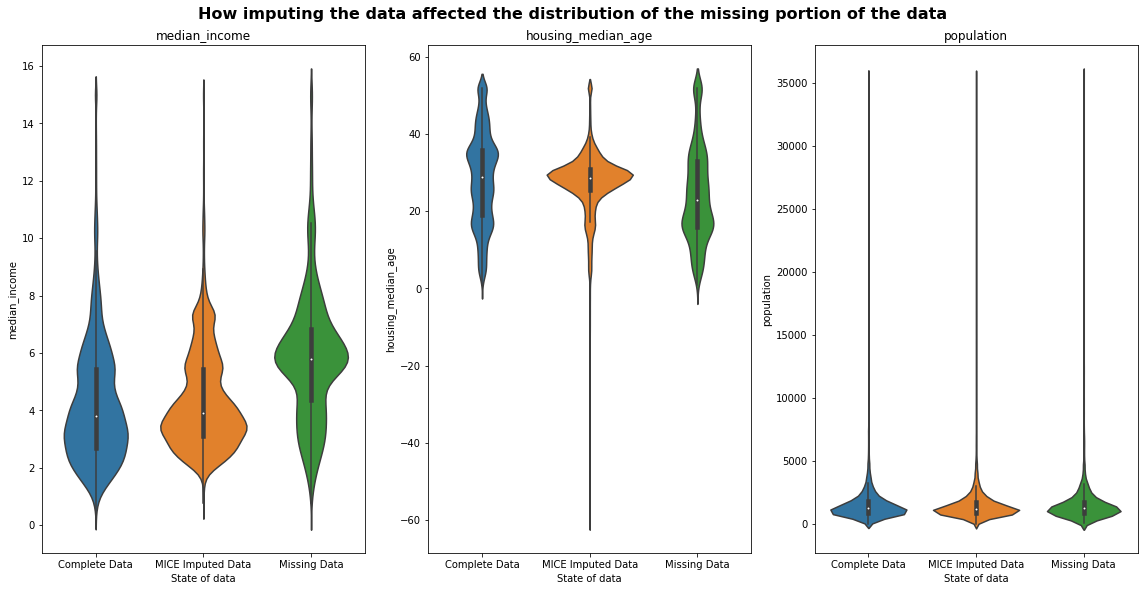

In [34]:
index = 1
fig = plt.figure(figsize = (16,8))
fig.suptitle('How imputing the data affected the distribution of the missing portion of the data', fontsize=16, fontweight='bold', y=1.02)

for i in compare_cmi.columns[:len(compare_cmi.columns)-1]:
  plt.subplot(1,3, index)
  sns.violinplot(data=compare_cmi, x='State of data', y=compare_cmi[i])
  plt.title(i)
  index = index + 1
plt.tight_layout()
plt.show()

From the above violinplot it appears that MICE imputation has made the distribution of the data fit closer to the complete dataset for the median income and population features, but is drastically different from both the complete data and the missing data for the housing median age feature.

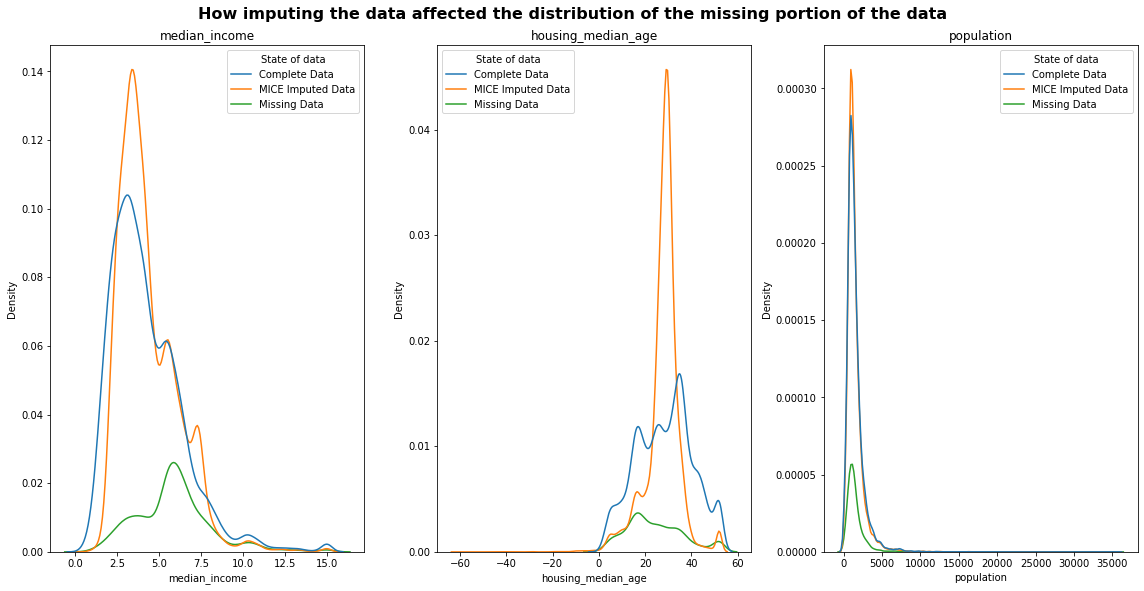

In [35]:
index = 1
fig = plt.figure(figsize = (16,8))
fig.suptitle('How imputing the data affected the distribution of the missing portion of the data', fontsize=16, fontweight='bold', y=1.02)

for i in compare_cmi.columns[:len(compare_cmi.columns)-1]:
  plt.subplot(1,3, index)
  sns.kdeplot(data=compare_cmi, x=compare_cmi[i], hue='State of data')
  plt.title(i)
  index = index + 1
plt.tight_layout()
plt.show()

From the above kdeplots it is clear that for median income and population the MICE imputation has performed very well as the MICE curves are of a similar shape and density as the complete data. Meanwhile the MICE curve for housing median age does not share a similar density to the complete curve and the shape isnt quite right either.

Generally, it appears as if MICE imputation has performed well for two of the features, as it has achieved a closer similarity to the complete data than the data with missing values for median income and population. However, MICE drastically fails when it comes to the housing median age.

### Effect of MICE imputation on the entire datatset

In [36]:
# Create a dataframe which merges the original dirty data with the cleaned data
# Add a column called 'State of data' and label the dirty data as 'dirty' and the 
# clean data as 'clean'. By doing this, I can illustrate the histograms and 
# violinplots below.

# Create new DataFrame
df_complete =  houses_complete.copy()
df_complete = df_complete[['median_income', 'housing_median_age', 'population']]
# Adding a new column with same values
complete_value = 'Complete Data'
df_complete.insert(len(df_complete.columns),'State of data',complete_value)

# Create new DataFrame
df_MICEimputed =  houses_MICEimputed.copy()
df_MICEimputed = df_MICEimputed[['median_income', 'housing_median_age', 'population']]
# Adding a new column with same values
imputed_value = 'MICE Imputed Data'
df_MICEimputed.insert(len(df_MICEimputed.columns),'State of data',imputed_value)

# merge the complete and imputed datasets together
compare_ci = pd.merge(df_complete, df_MICEimputed, how="outer", indicator=False)

# Create new DataFrame
df_missing =  houses_incomplete.copy()
df_missing = df_missing[['median_income', 'housing_median_age', 'population']]
# Adding a new column with same values
missing_value = 'Missing Data'
df_missing.insert(len(df_missing.columns),'State of data',missing_value)

# merge the complete, missing and imputed datasets together
compare_cmi = pd.merge(compare_ci, df_missing, how="outer", indicator=False)
compare_cmi

,median_income,housing_median_age,population,State of data
0,8.3252,41.0,322.0,Complete Data
1,8.3014,21.0,2401.0,Complete Data
2,7.2574,52.0,496.0,Complete Data
3,5.6431,52.0,558.0,Complete Data
4,3.8462,52.0,565.0,Complete Data
...,...,...,...,...
61915,1.5603,25.0,845.0,Missing Data
61916,2.5568,18.0,356.0,Missing Data
61917,1.7000,17.0,1007.0,Missing Data
61918,1.8672,18.0,741.0,Missing Data


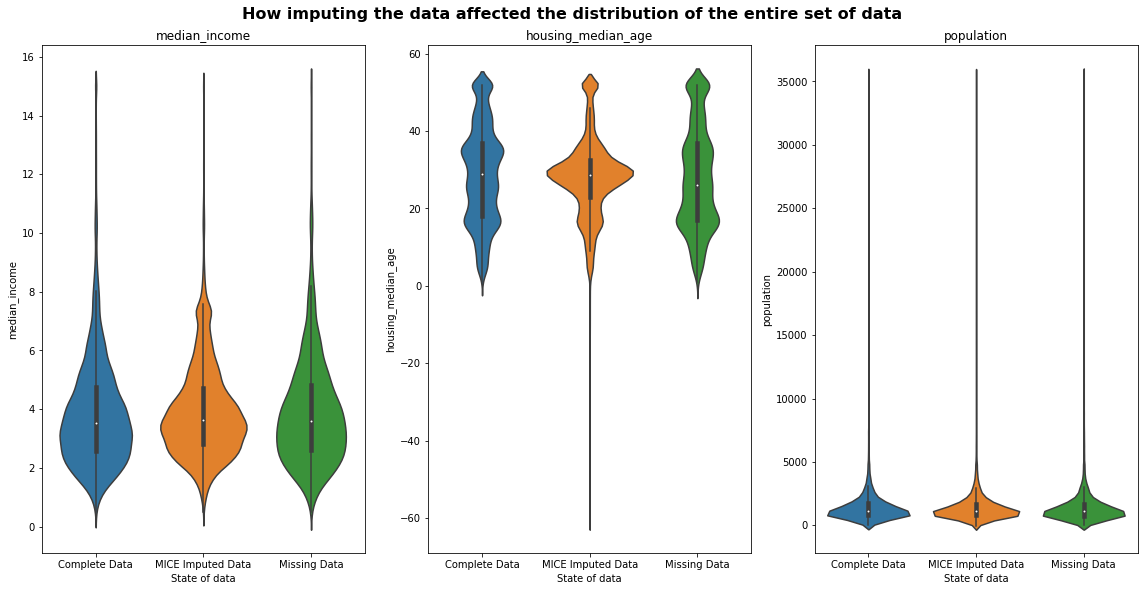

In [37]:
index = 1
fig = plt.figure(figsize = (16,8))
fig.suptitle('How imputing the data affected the distribution of the entire set of data', fontsize=16, fontweight='bold', y=1.02)

for i in compare_cmi.columns[:len(compare_cmi.columns)-1]:
  plt.subplot(1,3, index)
  sns.violinplot(data=compare_cmi, x='State of data', y=compare_cmi[i])
  plt.title(i)
  index = index + 1
plt.tight_layout()
plt.show()

From the above violinplot it appears that over the entire dataset MICE imputation marginally alters the distribution of the data hence the slight difference of shape in the different violinplots. 

In most cases, the missing data looks to share more simialrity to the complete dataset than the MICE imputed dataset. This, therefore, is proof of the negligible sucess of the MICE imputation.

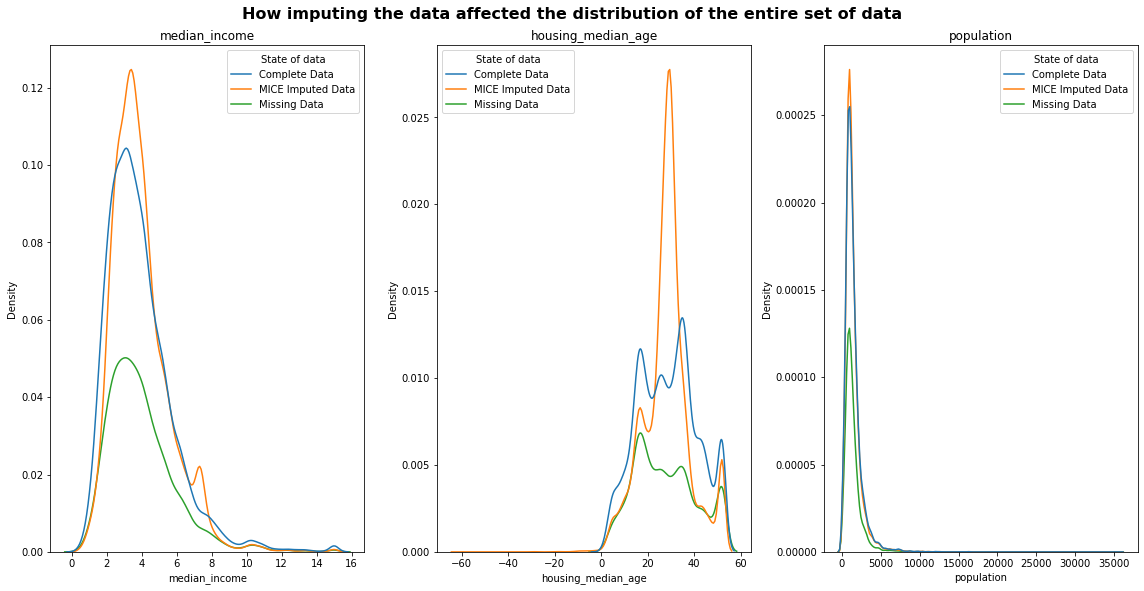

In [38]:
index = 1
fig = plt.figure(figsize = (16,8))
fig.suptitle('How imputing the data affected the distribution of the entire set of data', fontsize=16, fontweight='bold', y=1.02)

for i in compare_cmi.columns[:len(compare_cmi.columns)-1]:
  plt.subplot(1,3, index)
  sns.kdeplot(data=compare_cmi, x=compare_cmi[i], hue='State of data')
  plt.title(i)
  index = index + 1
plt.tight_layout()
plt.show()

From the above kdeplots it is clear that for median income and population the MICE imputation has performed very well as the MICE curves are of a similar shape and density as the complete data. while the MICE curve for housing median age shares a similar shape to the complete curve, the density isn't quite right.

Generally though, it appears as if MICE imputation has performed reasonably well, as it has achieved a closer similarity to the complete data than the data with missing values.

Having imputed the data I will now train a model using the imputed data and see how well it performs.

### Standardise Data

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_houses_MICEimputed = scaler.fit_transform(houses_MICEimputed)
scaled_houses_MICEimputed = pd.DataFrame(scaled_houses_MICEimputed, columns=c)
scaled_houses_MICEimputed.head()

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
0,2.129631,2.628957,1.277106,-0.804819,-0.970706,-0.943517,-0.977033,1.052548,-1.327835
1,1.314156,2.614645,-0.703593,2.045890,1.348649,1.896130,1.669961,1.043185,-1.322844
2,1.258693,1.986855,2.366490,-0.535746,-0.825895,-0.810708,-0.843637,1.038503,-1.332827
3,1.165100,1.016126,2.366490,-0.624215,-0.719067,-0.783045,-0.733781,1.038503,-1.337818
4,1.172900,-0.064406,2.366490,-0.462404,-0.612239,-0.771595,-0.629157,1.038503,-1.337818


### Train Regression Model 2

In [40]:
X_Features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']
X = scaled_houses_MICEimputed[X_Features]
Y = scaled_houses_MICEimputed['median_house_value']

In [41]:
print(X.shape)
print(Y.shape)

(20640, 8)
(20640,)


In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(16512, 8) (16512,)
(4128, 8) (4128,)


In [43]:
from sklearn.linear_model import LinearRegression

m2 = LinearRegression()

m2.fit(x_train, y_train)

LinearRegression()

### Regression Model 2 Results

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = m2.predict(x_test)
print("Root Mean Squared Error: ", mean_squared_error(y_test, y_pred, squared = False))
print("R2 Score: ", r2_score(y_test, y_pred))

Root Mean Squared Error:  0.4917905609621686
R2 Score:  0.7602023655061372


* Low RMSE, high R² (the best case)
* Low RMSE, low R²
* High RMSE, high R²
* High RMSE, low R² (the worst case)

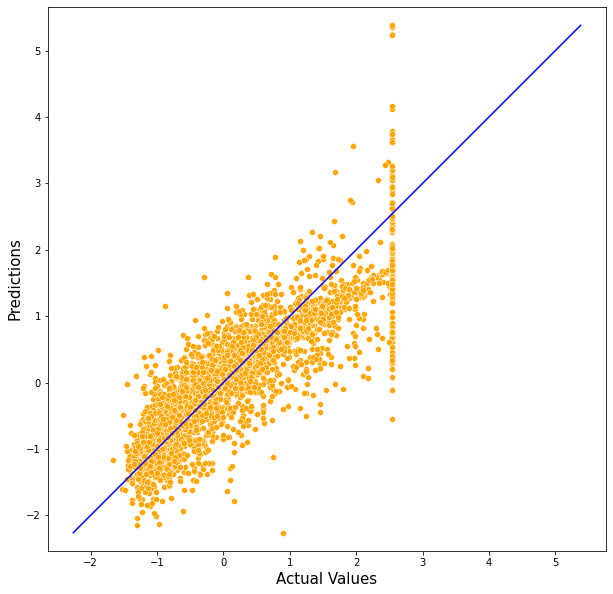

In [45]:
# Predicted values vs Actual values
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test, y=y_pred, color='orange')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')

plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

The closer to the data points are to the blue line, the more accurate the model preedicted that value.

## Conclusion

**KNN:** By feeding the KNN imputed dataset into the linear regression model m1, m1 achieved:
* A Root Mean Squared Error value of ** 0.5412**.
* A R2 Score of **0.7060**.

**MICE:** By feeding the MICE imputed dataset into the linear regression model m2, m2 achieved:
* A Root Mean Squared Error value of **.4945**.
* A R2 Score of **0.7546**.

*Note that a RMSE is perfect when = 0 and an R2 score is perfect when = 1. The closer the RMSE values above are to 0 and the closer the R2 scores above are to 1, the better the model*

---

The difference in these metric scores, given the same implementation was used for both of the regression models, is therefore due to the **quality and accuracy of the imputed data** that is fed into the regression models.

The results indicate that the KNN imputed data was less sucessful than the MICE imputed data at predicting the median house value in a region. This does not definitvely prove that KNN is better than MICE, it merely illustrates that the MICE imputed data formed a stronger correlation with the median house value than the KNN imputed data managed to achieve. 

---

To discover the true success of both models, I fed the original and complete data into the same linear regression model, m3 which can be seen below. This achieved:
* A Root Mean Squared Error value of **0.6029**.
* A R2 Score of **0.6350**.

If we consider the performance of the model below (m3) to be the ground truth, it could be argued that both imputation techniques were somewhat inaccurate given the noticable difference in the performance of models m1 and m2 in comparison to m3. This difference also indicates that both the KNN and MICE imputation methods have artifically increased the accuracy of m1 and m2 respectively.

---
Overall, I would chose KNN Imputation as my method of imputation as MICE can extend into negative values and this can cause issues when applied to the real-world when considering features such as population or age of a house. Here, the significance is not the accuracy of the model but how well the imputed data ressembles the complete dataset, therefore KNN seems to be more suitable.

The performance metrics for the KNN imputed model (m1) is also closer to the ground truth (m3) than the MICE imputed model (m2), therefore potentially indciating a closer correlation to the original and complete dataset. 

### The issue with MICE imputation

In [46]:
# Illustrate issue with MICE
NegMICE = houses_MICEimputed.loc[(houses_MICEimputed['population'] < 0) |
                                 (houses_MICEimputed['housing_median_age'] < 0) | 
                                 (houses_MICEimputed['median_income'] < 0)]
NegMICE.head(10)

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
2311,143700.0,4.291400,-0.779361,13802.0,2244.0,5835.986527,1972.0,36.87,-119.75
3086,90000.0,2.579889,26.599070,1491.0,408.0,-43.015944,48.0,35.72,-118.59
3364,67500.0,5.517900,36.000000,36.0,8.0,-6.627772,7.0,40.41,-120.51
5921,349100.0,7.184652,-9.229501,17715.0,2370.0,7555.673194,2312.0,34.15,-117.71
5924,358700.0,7.195664,-6.515435,16759.0,2274.0,7009.497780,2156.0,34.13,-117.76
5964,348900.0,7.251263,-11.147542,18448.0,2474.0,7824.753247,2397.0,34.08,-117.81
6055,310700.0,6.586135,-5.952807,17820.0,2812.0,8044.272307,2666.0,33.99,-117.86
6057,253900.0,7.117721,-37.554610,32054.0,5290.0,14858.930912,5050.0,34.03,-117.78
6061,315600.0,6.747540,-8.484899,18690.0,2862.0,8497.662873,2777.0,34.02,-117.79
6063,267000.0,6.054901,-6.141049,17527.0,2751.0,8105.189841,2676.0,33.99,-117.83


In [47]:
print("Number of records with negative predicted values: " + str(len(NegMICE)))

Number of records with negative predicted values: 54


Notice the negative values for population, median income and housing median age. This is one of the downsides of MICE as it can produce negative values. In this case in particular a negative population house age makes no sense in the real-world.

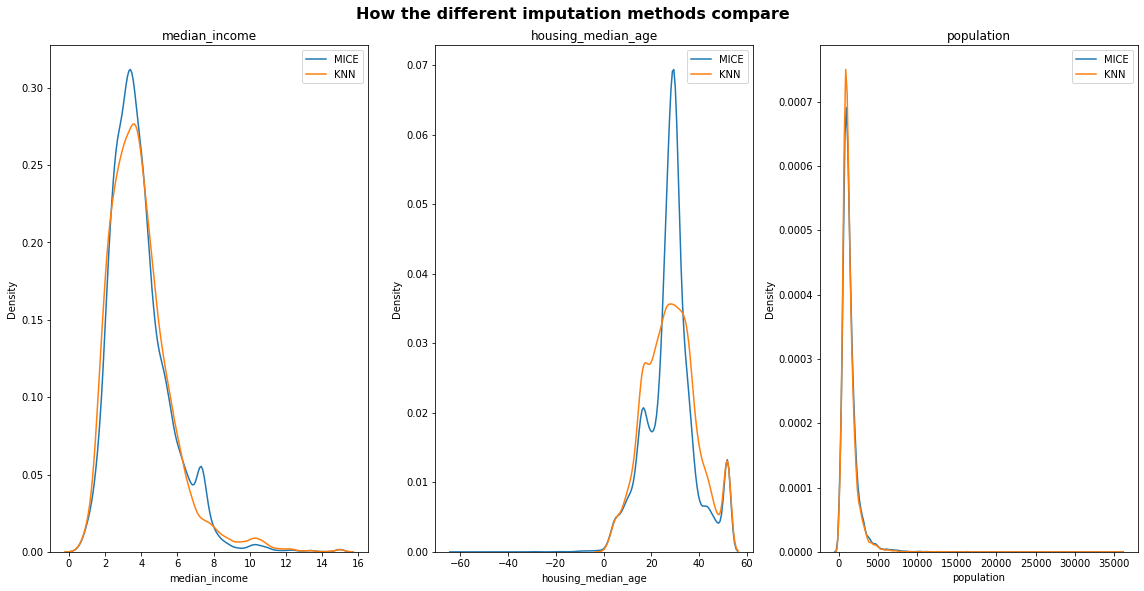

In [48]:
index = 1
fig = plt.figure(figsize = (16,8))
fig.suptitle('How the different imputation methods compare', fontsize=16, fontweight='bold', y=1.02)

for i in compare_cmi.columns[:len(compare_cmi.columns)-1]:
  plt.subplot(1,3, index)
  sns.kdeplot(houses_MICEimputed[i], legend=True)
  sns.kdeplot(houses_KNNimputed[i], legend=True)
  plt.legend(labels=["MICE","KNN"])
  plt.title(i)
  index = index + 1
plt.tight_layout()
plt.show()

### How effectively would the original/complete dataset predict the median house value?

#### Standardise Data

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_houses_complete = scaler.fit_transform(houses_complete)
scaled_houses_complete = pd.DataFrame(scaled_houses_complete, columns=c)
scaled_houses_complete.head()

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
0,2.129631,2.344766,0.982143,-0.804819,-0.970706,-0.974429,-0.977033,1.052548,-1.327835
1,1.314156,2.332238,-0.607019,2.045890,1.348649,0.861439,1.669961,1.043185,-1.322844
2,1.258693,1.782699,1.856182,-0.535746,-0.825895,-0.820777,-0.843637,1.038503,-1.332827
3,1.165100,0.932968,1.856182,-0.624215,-0.719067,-0.766028,-0.733781,1.038503,-1.337818
4,1.172900,-0.012881,1.856182,-0.462404,-0.612239,-0.759847,-0.629157,1.038503,-1.337818


#### Regression Model

In [50]:
X_Features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']
X = scaled_houses_complete[X_Features]
Y = scaled_houses_complete['median_house_value']

In [51]:
print(X.shape)
print(Y.shape)

(20640, 8)
(20640,)


In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(16512, 8) (16512,)
(4128, 8) (4128,)


In [53]:
from sklearn.linear_model import LinearRegression

m3 = LinearRegression()

m3.fit(x_train, y_train)

LinearRegression()

In [54]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = m3.predict(x_test)
print("Root Mean Squared Error: ", mean_squared_error(y_test, y_pred, squared = False))
print("R2 Score: ", r2_score(y_test, y_pred))

Root Mean Squared Error:  0.5905865656932054
R2 Score:  0.6430478004800729


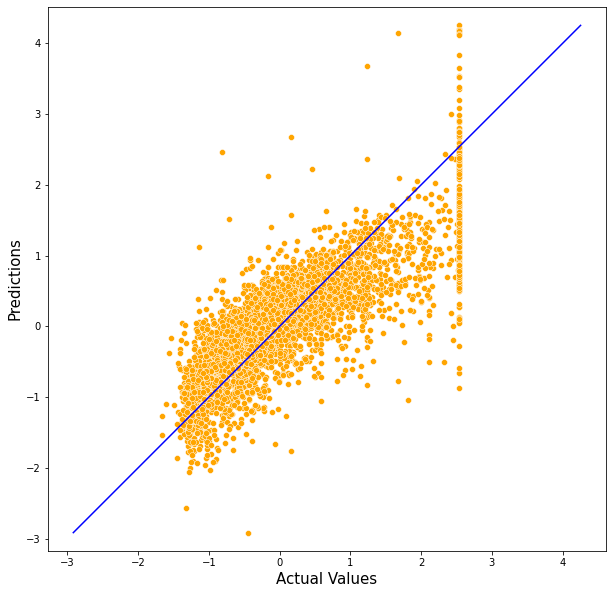

In [55]:
# Predicted values vs Actual values
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test, y=y_pred, color='orange')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')

plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()